### **Data Analysis Using Python**

This Notebook expplores an anlaysis on a Dataset about Mental Health.

# Columns
*   **User_ID**: Unique identifier for each participant.
*   **Age**: Age of the participant.
*   **Gender**: Gender of the participant (e.g., Male, Female, Non-binary).
*   **Occupation**: The participant's profession.
*   **Country**: Country of residence.
*   **Mental_Health_Condition**: Indicates if the participant has a mental health condition (Yes/No).
*   **Severity**: Severity of the mental health condition (e.g., None, Low, Medium, High).
*   **Consultation_History**: Whether the participant has sought mental health consultation (Yes/No).
*   **Stress_Level**: Self-reported stress level (e.g., Low, Medium, High).
*   **Sleep_Hours**: Number of hours of sleep per day.
*   **Work_Hours**: Number of work hours per week.
*   **Physical_Activity_Hours**: Number of hours of physical activity per week.



# Data Loading

Question?

What is the structure of the dataset (rows, columns)?

Are there any immediate data quality concerns (e.g., missing or duplicate data)?

What types of variables (categorical, numerical) are present?

In [34]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv('mental_health_dataset.csv')
data.head(5)

# Importing The dataset as a csv file and viewing the first 5 rows of the dataset

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [36]:
#Finding out the datatypes of each of the columns

data.dtypes

,0
User_ID,int64
Age,int64
Gender,object
Occupation,object
Country,object
Mental_Health_Condition,object
Severity,object
Consultation_History,object
Stress_Level,object
Sleep_Hours,float64


In [37]:
print(data.isnull().sum())

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64


In [38]:
print(data['Severity'].unique())

['Medium' nan 'High' 'Low']


The Severity column has four distinct values, from which one of them was nan indicating severity as None. So I changed The values of all the 'nan' to 'None' for better understanding.

In [39]:
data['Severity'] = data['Severity'].fillna('None')
print(data.isnull().sum())

User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64


In [40]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [User_ID, Age, Gender, Occupation, Country, Mental_Health_Condition, Severity, Consultation_History, Stress_Level, Sleep_Hours, Work_Hours, Physical_Activity_Hours]
Index: []


**Data Loading Answers:**

The Dataset Contains 1000 rows and 12 columns.

There are no missing values or duplicate data within the datatset.

There are two types of variables present, categorical and numerical.

    5 Variables are Numerical which consists of 'int' and 'float'.

    7 Varibales are Categorical which are 'object'.

# Data Exploration

**Questions**

What are the basic statistics of the numerical variables (mean, min, max)?

How are categorical variables distributed?

Are there any outliers or unexpected values in the dataset?

Are there any correlations or patterns among numerical variables?

In [41]:
data.describe()
# Describing the Dataset to see their attributes.

,User_ID,Age,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.89200,7.095600,54.621000,5.134000
std,288.819436,13.97475,1.713861,14.709035,3.081808
min,1.000000,18.00000,4.000000,30.000000,0.000000
25%,250.750000,30.00000,5.600000,42.000000,3.000000
50%,500.500000,42.00000,7.100000,55.000000,5.000000
75%,750.250000,54.00000,8.500000,67.000000,8.000000
max,1000.000000,65.00000,10.000000,80.000000,10.000000


In [42]:
Categorical_Columns = data.select_dtypes(include='object').columns

for col in Categorical_Columns:
      print(f"Distribution of {col}:")
      print(data[col].value_counts())
      print()

Distribution of Gender:
Gender
Female               270
Non-binary           267
Male                 247
Prefer not to say    216
Name: count, dtype: int64

Distribution of Occupation:
Occupation
Other          161
Healthcare     149
Engineering    148
Finance        139
Sales          135
Education      135
IT             133
Name: count, dtype: int64

Distribution of Country:
Country
Australia    160
India        155
USA          152
Germany      141
UK           139
Canada       138
Other        115
Name: count, dtype: int64

Distribution of Mental_Health_Condition:
Mental_Health_Condition
Yes    515
No     485
Name: count, dtype: int64

Distribution of Severity:
Severity
None      501
Low       176
Medium    164
High      159
Name: count, dtype: int64

Distribution of Consultation_History:
Consultation_History
No     505
Yes    495
Name: count, dtype: int64

Distribution of Stress_Level:
Stress_Level
High      342
Low       338
Medium    320
Name: count, dtype: int64



<ipython-input-43-97d45466f3e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


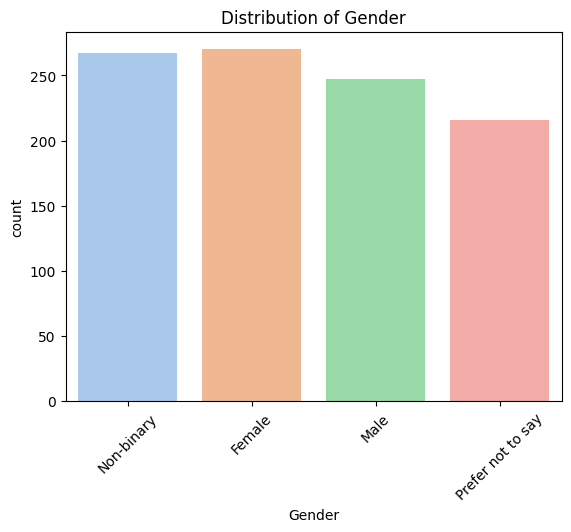

<ipython-input-43-97d45466f3e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


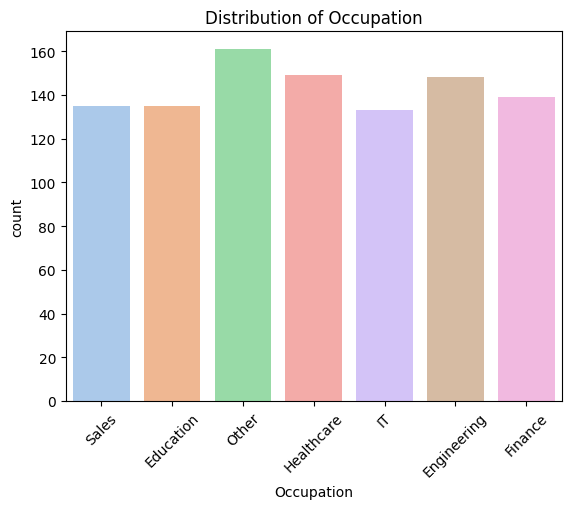

<ipython-input-43-97d45466f3e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


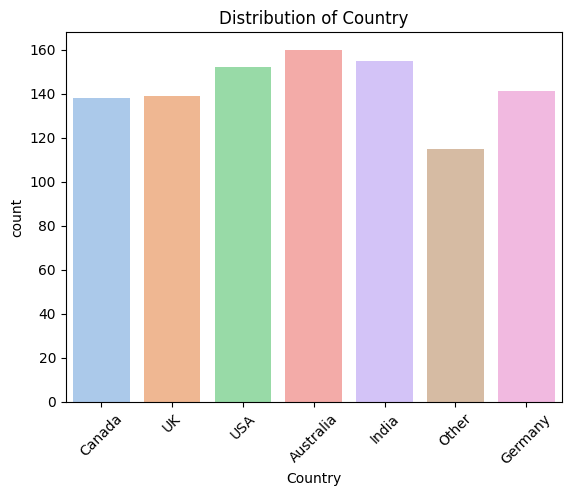

<ipython-input-43-97d45466f3e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


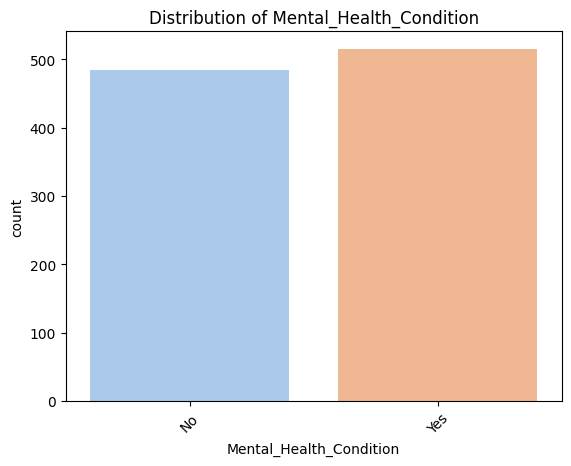

<ipython-input-43-97d45466f3e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


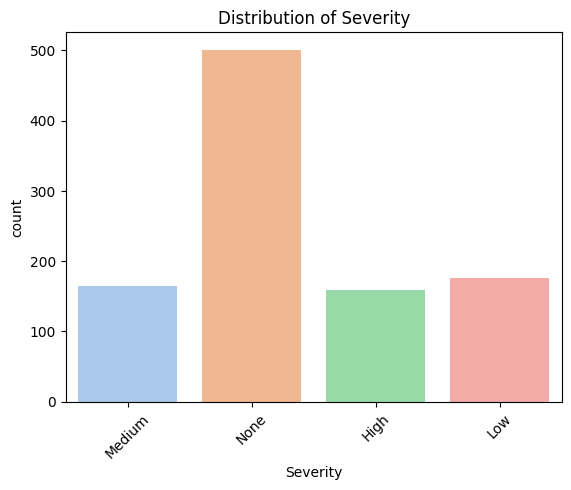

<ipython-input-43-97d45466f3e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


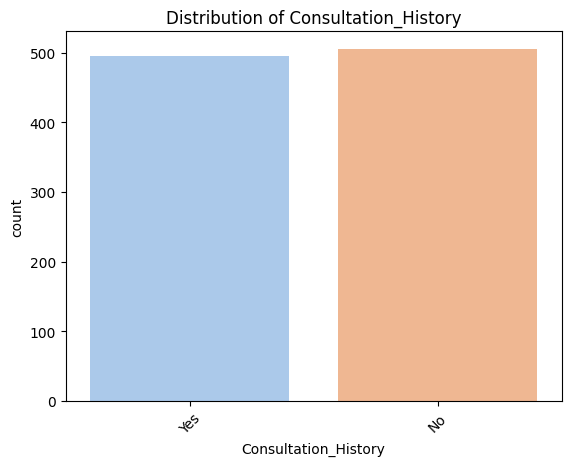

<ipython-input-43-97d45466f3e1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='pastel')


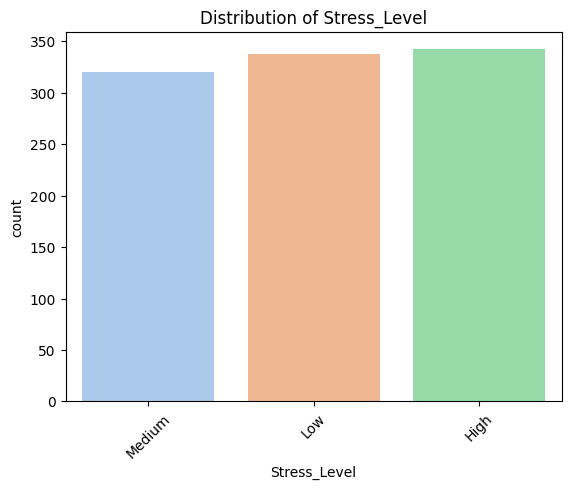

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in Categorical_Columns:
  sns.countplot(data=data, x=col, palette='pastel')
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=45)
  plt.show()

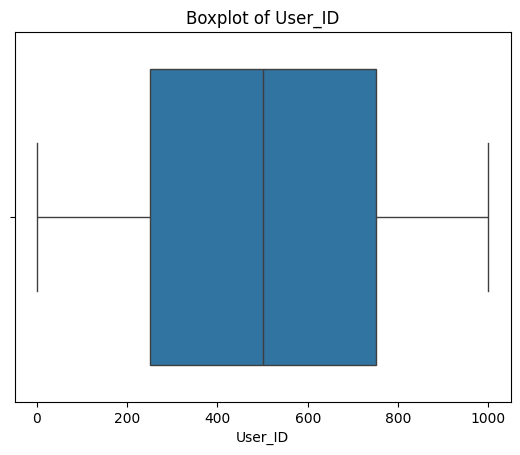

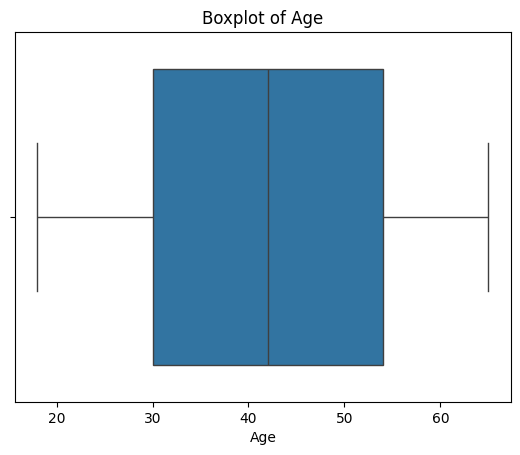

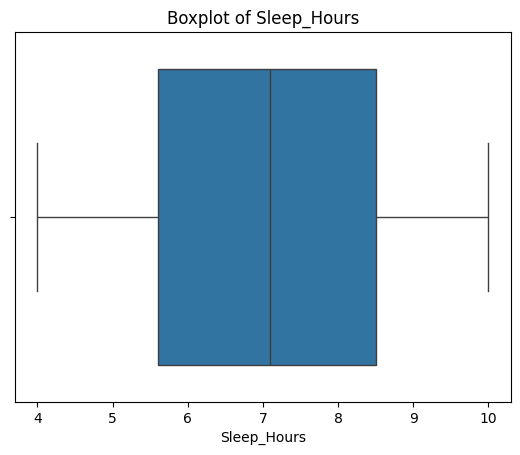

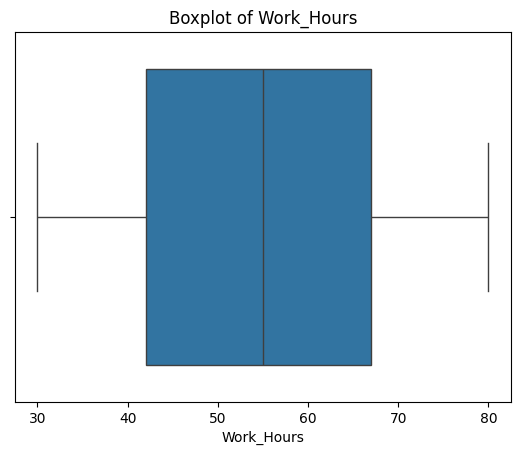

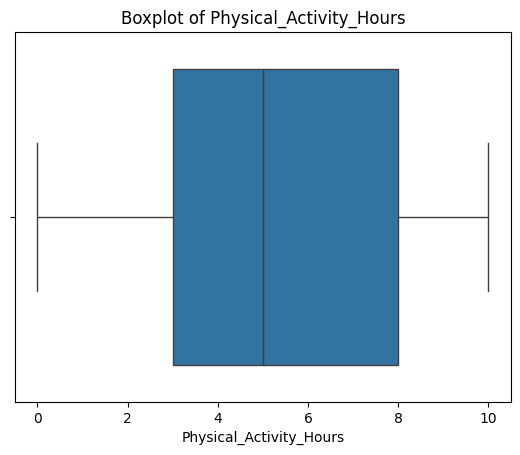

In [44]:
Numerical_Columns = data.select_dtypes(include=['int64','float64']).columns

for col in Numerical_Columns:
  sns.boxplot(x=data[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

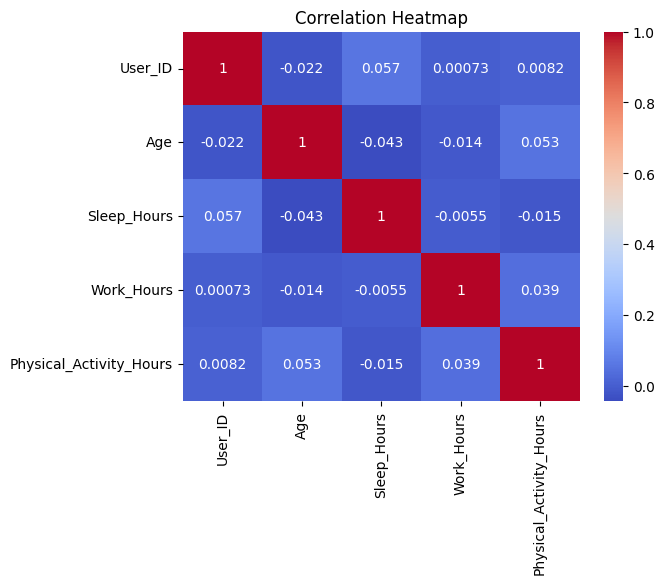

In [45]:
Numerical_Columns = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[Numerical_Columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Answers:

1.
The Mean for numerical values are:

	user ID = 500
	Age = 41
	Sleep_Hours = 7.096
	Work Hours = 54.62
	Pyhsical Activity Hours = 5.13
The minimum value for numerical values are:

	user ID = 1
	Age = 18
	Sleep_Hours = 4
	Work Hours = 30
	Pyhsical Activity Hours = 0
The maximum value for numerical values are:

	user ID = 1000
	Age = 65
	Sleep_Hours = 10
	Work Hours = 80
	Pyhsical Activity Hours = 10

  2.The Categorical Variables:

  The gender distribution is fairly balanced, with equal representation across different categories.

  The occupation categories are fairly diverse, with "Other" having the highest count, followed by Healthcare and Engineering.

  The dataset is fairly distributed across countries, with Australia, India, and the USA having the highest number of participants. "Other" seems to capture miscellaneous countries.

There is a slight imbalance between the "Yes" and "No" categories, with more individuals reporting having a mental health condition.

The majority of participants have reported "None" for severity, followed by low, medium, and high. This indicates that most participants perceive their mental health condition as either non-existent or mild.

The distribution of whether participants have sought consultation is nearly balanced, with a very small difference between those who have and haven’t consulted a professional.

Stress levels are fairly evenly distributed, with a slight preference for "High" and "Low" stress, while "Medium" has the lowest count.


Ans-3

There are no outliners or unexpected values in the dataset.

Ans-4

There are some positive correlation between the numerical values such as the user_id and Sleep hours.

The age of a user and the pyhsical activity hours has a slighly positive correlation.

# Data Visualisation

Question

Are there trends or patterns that visualizations can reveal about mental health conditions (e.g., severity, consultation history)?

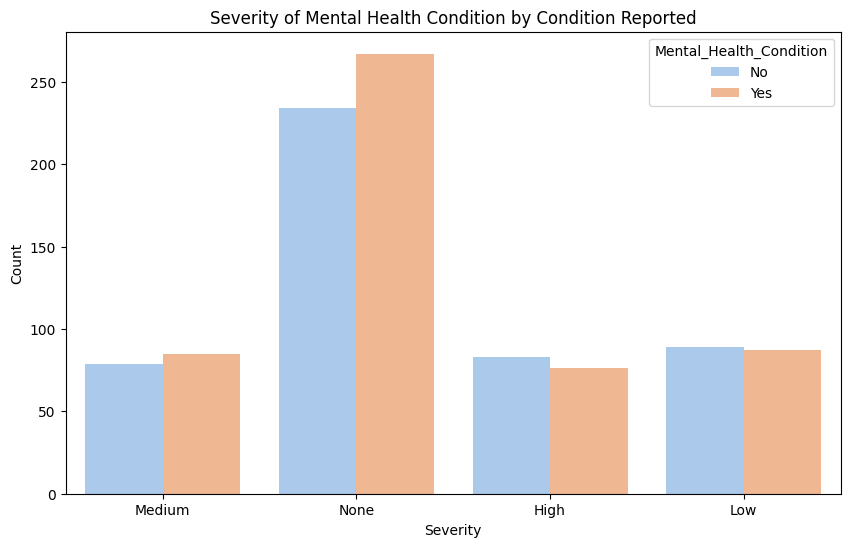

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x ='Severity', hue='Mental_Health_Condition', palette='pastel')
plt.title('Severity of Mental Health Condition by Condition Reported')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

The Plot shows that the mental health condition reported are evenly distributied across the different severity level given the amount of counts. The people with severity of none even reported to have mental health condition which implies that even if they do not have any level of severity, they still have a mental health condition.

<function matplotlib.pyplot.show(close=None, block=None)>

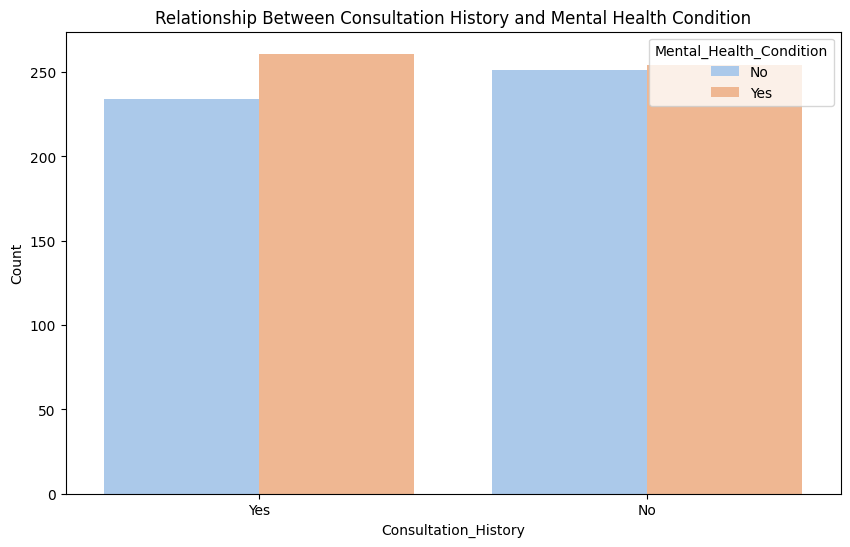

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x = 'Consultation_History', hue='Mental_Health_Condition', palette='pastel')
plt.title('Relationship Between Consultation History and Mental Health Condition')
plt.xlabel('Consultation_History')
plt.ylabel('Count')
plt.show

The Plot implies that around 260 people with mental health condition have consultaion history and around 240 people have gotten consulted even if they do not have mental health condition.

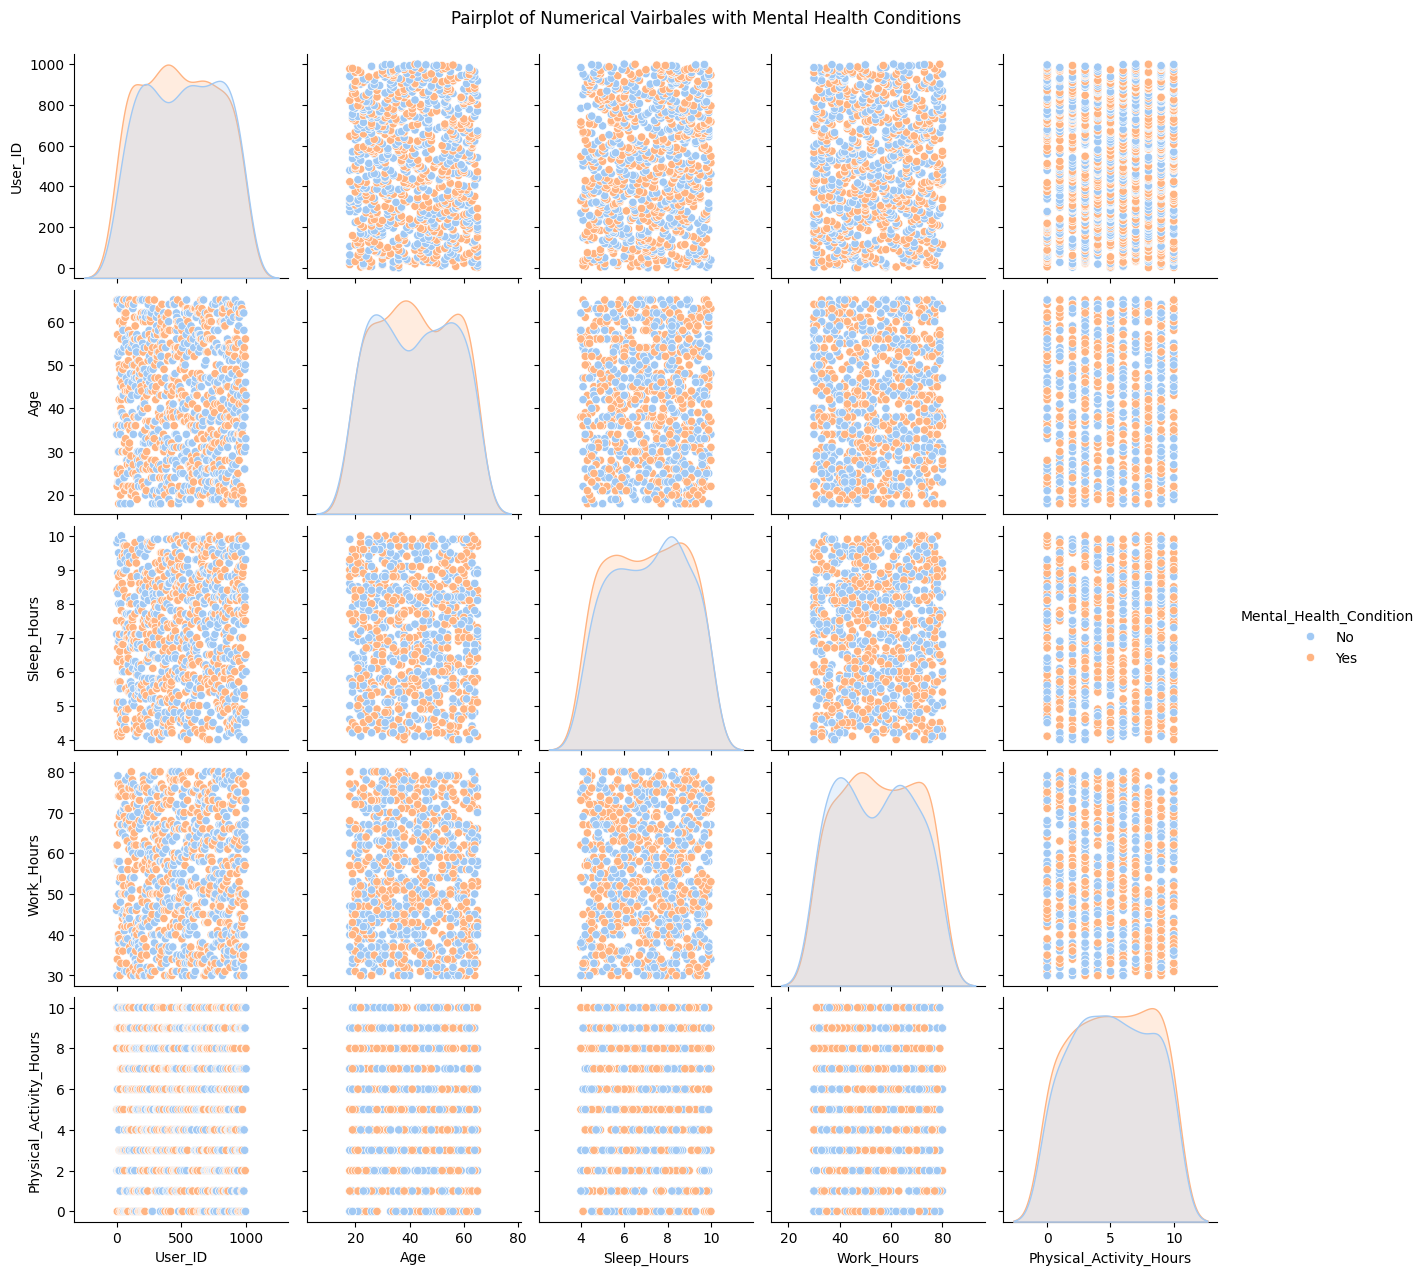

In [48]:
sns.pairplot(data, hue='Mental_Health_Condition', palette='pastel', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Vairbales with Mental Health Conditions', y=1.02)
plt.show()

The pairplot implies that a person having having mental health condtiion is evenly distributed at any stage of the columns. It implies that a person can have a mental health condition at any stage of their life.

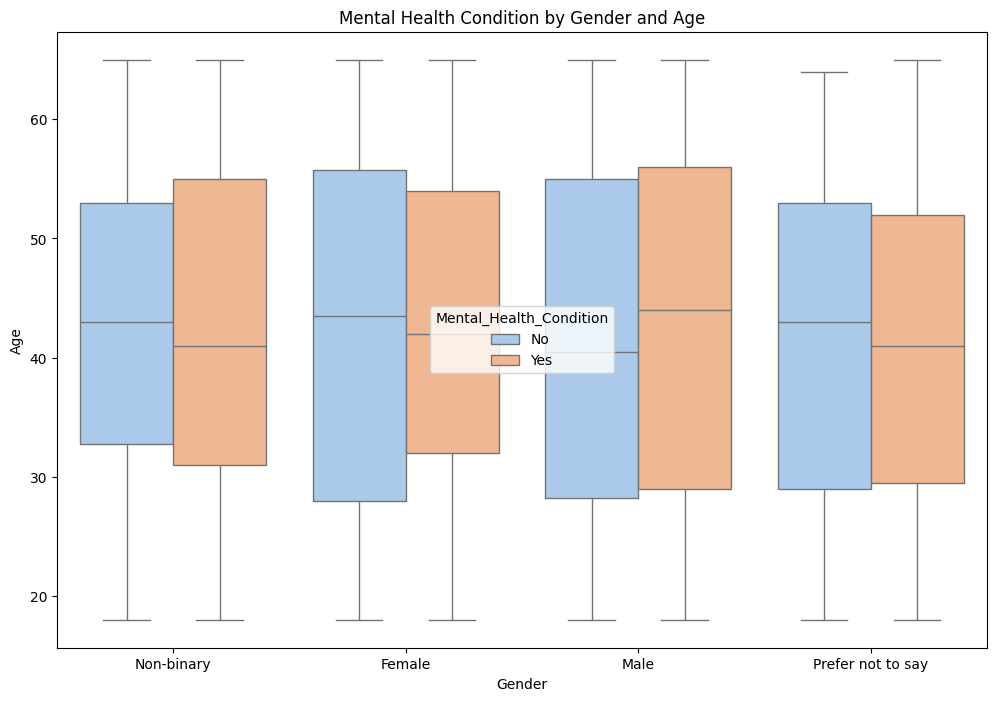

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='Gender', y='Age', hue='Mental_Health_Condition', palette='pastel')
plt.title('Mental Health Condition by Gender and Age')
plt.show()

The Plot implies that average and median of all the genders having or not having a mental health condition are when a person is in their middle addulthood. This could be because of work issues and having family issues